# Predictive maintainance of Aircrafts

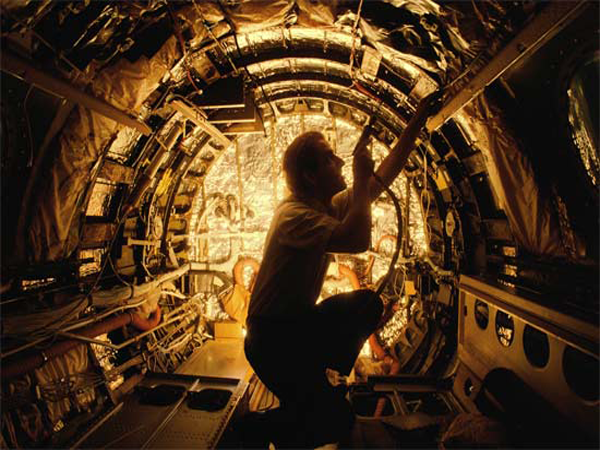

## Data Wrangling

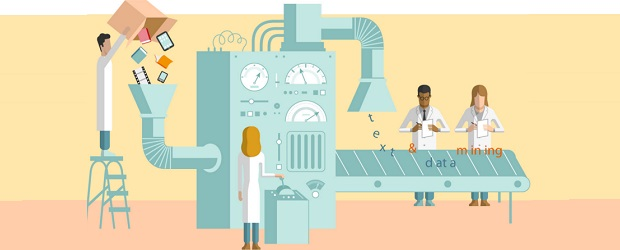

# Step 1:

In [ ]:
#@title Importing Libraries
#Importing Libraries
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Import Libraries")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    #print("Button clicked.")
      import pandas as pd
      import numpy as np
      print("Done importing Pandas and Numpy")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Import Libraries', style=ButtonStyle())

Output()

# Dataset Description and location:

### Data Source ###

___Training Data:___  The aircraft engine run-to-failure data.
[download trianing data](http://azuremlsamples.azureml.net/templatedata/PM_train.txt)  
___Test Data:___ The aircraft engine operating data without failure events recorded.
[download test data](http://azuremlsamples.azureml.net/templatedata/PM_test.txt)  
___Ground Truth Data:___ The true remaining cycles for each engine in the testing data.
[download truth data](http://azuremlsamples.azureml.net/templatedata/PM_truth.txt)  

For simplicity, data files have been downloaded to local Data folder.

### Data Columns

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only) 
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [ ]:
#@title Adding dataset column names:
#@markdown We add column names to the dataset

#@markdown They are: 

#@markdown Dataset column names:'id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21'


import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Add Labels")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    print("Labels added :)")
button.on_click(on_button_clicked)
display(button, output)

Button(description='Add Labels', style=ButtonStyle())

Output()

In [ ]:
#@title Load Training Dataset
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
button = widgets.Button(description="Load Training Dataset")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    print("Training Dataset is as follows:")
    print(pd.read_csv('PM_train.txt', sep = ' ', header=None))

button.on_click(on_button_clicked)
display(button, output)

Button(description='Load Training Dataset', style=ButtonStyle())

Output()

In [ ]:
#@title To view training raw dataset head:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Training Dataset")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_train_raw = pd.read_csv('PM_train.txt', sep = ' ', header=None)
    df_train_raw.head()
    print(df_train_raw.head())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Training Dataset', style=ButtonStyle())

Output()

In [ ]:
#@title Preprocessing the data by dropping extra space column and assigning column names
df_train_raw = pd.read_csv('PM_train.txt', sep = ' ', header=None)
df_train_raw.drop([26,27], axis=1, inplace=True)
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_train_raw.columns = col_names
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
#@title Training Dataset Statistics
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Get Stat!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    #print("Button clicked.")
    print(df_train_raw.describe())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Stat!', style=ButtonStyle())

Output()

# Turbofan Engine under Maintainance

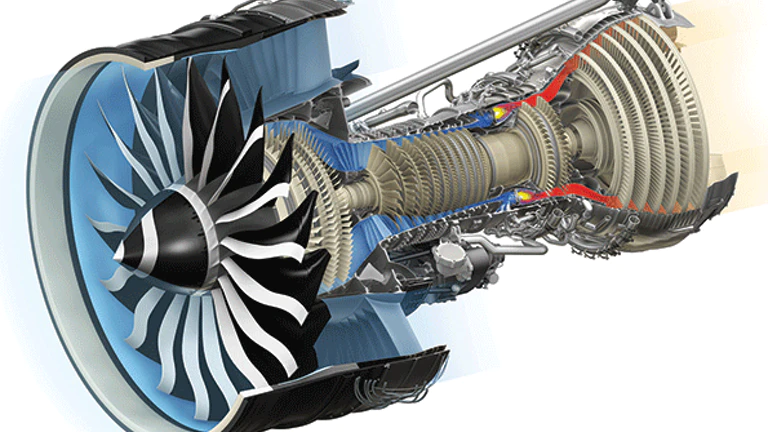

There are 100 engines. Each engine has between 1 to 362 cycles (average of 108 cycles per engine). The last cycle for each engine represents the cycle when failure had happened.

In [ ]:
#@title Check the datatype of each column
# check the data types

Datatype_Checked = True #@param {type:"boolean"}
if Datatype_Checked == True:
  print(df_train_raw.dtypes)



id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object


All data columns are numeric.

In [ ]:
#@title Check for missing values
# check for NaN values
v=True
Missing_Values_Checked = True #@param {type:"boolean"}
if Missing_Values_Checked == True:
  print(df_train_raw.isnull().sum())

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64


No missing values. This is a clean dataset!

### Load Test Data:

In [ ]:
#@title Load test data
#load test data

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Load Test Dataset")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Test Dataset is as follows:")
    df_test_raw = pd.read_csv('PM_test.txt', sep = ' ', header=None)
    print(df_test_raw.head())

button.on_click(on_button_clicked)
display(button, output)


Button(description='Load Test Dataset', style=ButtonStyle())

Output()

In [ ]:
#@title Preprocessing test data by dropping extra space column and assign colum name
#load test data
#@title Load Training Dataset
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Preprocess Test Dataset")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    #drop extra space columnn
    df_test_raw = pd.read_csv('PM_test.txt', sep = ' ', header=None)
    df_test_raw.drop([26,27], axis=1, inplace=True)

    #assign column names
    col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    df_test_raw.columns = col_names
    print(df_test_raw.head())

button.on_click(on_button_clicked)
display(button, output)


Button(description='Preprocess Test Dataset', style=ButtonStyle())

Output()

In [ ]:
#@title Test dataset description
# get some stat on test data



#@title Load Training Dataset
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Get Stats!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_test_raw = pd.read_csv('PM_test.txt', sep = ' ', header=None)
    print(df_test_raw.describe())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get Stats!', style=ButtonStyle())

Output()

Same as training data, there are 100 engines, each engine has between 1 to 303 cycles (average of 76 cycles per engine). But this time, failure cycle was not provided.  

Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.

### Load Truth Data:

In [ ]:
#@title Loading the truth data - actual 'ttf' for test data
# Load the truth data - actual 'ttf' for test data



#@title Load test data
#load test data

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Load Truth Data")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
    print(df_truth.head())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Load Truth Data', style=ButtonStyle())

Output()

In [ ]:
#@title Preprocess data by dropping extra empty column in the truth data and rename remaining 'ttf'
#drop extra empty column in the truth data and rename remaining 'ttf'




#@title Load test data
#load test data

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Preprocess Truth Data")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
    df_truth.drop([1], axis=1, inplace=True)
    df_truth.columns = ['ttf']
    print(df_truth.head())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Preprocess Truth Data', style=ButtonStyle())

Output()

In [ ]:
#@title Geting stat for truth data description
# Load the truth data - actual 'ttf' for test data



#@title Load test data
#load test data

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Get stat!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
    print(df_truth.describe())

button.on_click(on_button_clicked)
display(button, output)

Button(description='Get stat!', style=ButtonStyle())

Output()

To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. This will give us a test set of 100 engines with their TTF data. Will do that later when we create regression and classification labels for both training and test data. 

But now let us add some features to smooth the sensors reading: rolling average and rolling standard deviation.


### Feature Extraction:

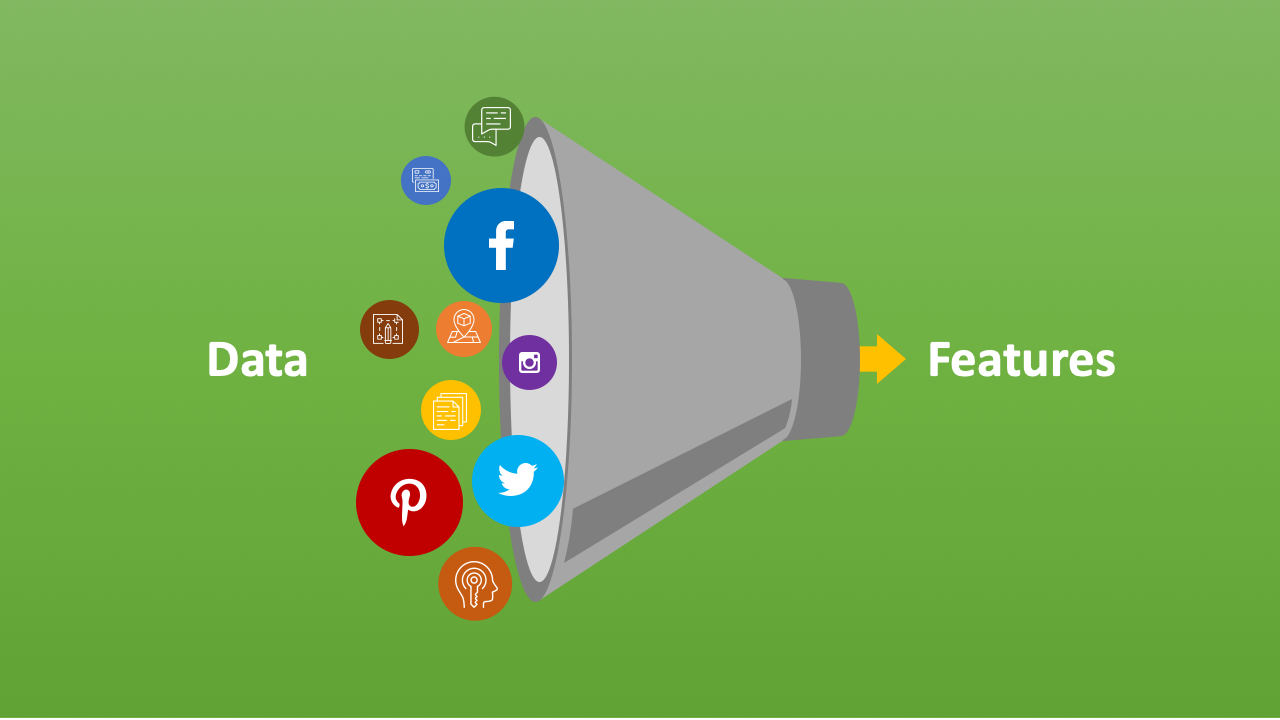

Create helper function to create features based on smoothing the time series for sensors by adding rolling mean and rolling standard deviation

In [ ]:
#@title Create Add feature function

def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

create helper function to add the regression and classification labels to the training data

In [ ]:
#@title Create Prepare Training Data function
def prepare_train_data (df_in, period):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
          
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in

create helper function to add the regression and classification labels to the training data

In [ ]:
#@title Create Prepare test data function

def prepare_test_data(df_test_in, df_truth_in, period):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    

    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

With the help of these functions, let us prepare training and test data by adding features and labels

### Prepare the Training Data:

Keep No. of features as 5 for optimal results

In [ ]:

#@title Number fields
#Number_of_Features = 5 #@param {type:"integer"}
Number_of_Features = 5 #@param {type:"slider", min:0, max:100, step:1}



df_train_fx = add_features(df_train_raw, Number_of_Features)
df_train_fx.head()


print(df_train_fx.head())
print(Number_of_Features)

   id  cycle  setting1  setting2  ...  sd18  sd19      sd20      sd21
0   1      1   -0.0007   -0.0004  ...   0.0   0.0  0.000000  0.000000
1   1      2    0.0019   -0.0003  ...   0.0   0.0  0.042426  0.003253
2   1      3   -0.0043    0.0003  ...   0.0   0.0  0.055076  0.044573
3   1      4    0.0007    0.0000  ...   0.0   0.0  0.076322  0.037977
4   1      5   -0.0019   -0.0002  ...   0.0   0.0  0.073621  0.033498

[5 rows x 68 columns]
5


Setting the classification period (Ideally keep Period=30 for optimal results)

In [ ]:
#add labels to training data using period of 30 cycles for classification
#@title Number fields
#Number_of_Features = 5 #@param {type:"integer"}
Number_of_cycles = 30 #@param {type:"slider", min:0, max:100, step:1}


print(df_train_fx.head())
print(Number_of_cycles)


df_train = prepare_train_data (df_train_fx, Number_of_cycles)
print(df_train.head())

   id  cycle  setting1  setting2  ...  sd18  sd19      sd20      sd21
0   1      1   -0.0007   -0.0004  ...   0.0   0.0  0.000000  0.000000
1   1      2    0.0019   -0.0003  ...   0.0   0.0  0.042426  0.003253
2   1      3   -0.0043    0.0003  ...   0.0   0.0  0.055076  0.044573
3   1      4    0.0007    0.0000  ...   0.0   0.0  0.076322  0.037977
4   1      5   -0.0019   -0.0002  ...   0.0   0.0  0.073621  0.033498

[5 rows x 68 columns]
30
   id  cycle  setting1  setting2  ...      sd21  ttf  label_bnc  label_mcc
0   1      1   -0.0007   -0.0004  ...  0.000000  191          0          0
1   1      2    0.0019   -0.0003  ...  0.003253  190          0          0
2   1      3   -0.0043    0.0003  ...  0.044573  189          0          0
3   1      4    0.0007    0.0000  ...  0.037977  188          0          0
4   1      5   -0.0019   -0.0002  ...  0.033498  187          0          0

[5 rows x 71 columns]


Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the training data.  

Let us save the dataframe for later use in data exploration and modeling phases.

In [ ]:
#@title Save final preprocessed training data
#load test data

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Save final train data")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_train.to_csv('train.csv', index=False)
    print("Saves as csv")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Save final train data', style=ButtonStyle())

Output()

### Prepare the Test Data:

In [ ]:



#@title Number fields
#Number_of_Features = 5 #@param {type:"integer"}
Number_of_Features = 5 #@param {type:"slider", min:0, max:100, step:1}



# add extracted features to test data
df_test_raw = pd.read_csv('PM_test.txt', sep = ' ', header=None)
df_test_raw.drop([26,27], axis=1, inplace=bool(True))

#assign column names
df_test_raw.columns = col_names
df_test_fx = add_features(df_test_raw, Number_of_Features)
df_test_fx.head()


print(df_test_fx.head())
print(Number_of_Features)

   id  cycle  setting1  setting2  ...  sd18  sd19      sd20      sd21
0   1      1    0.0023    0.0003  ...   0.0   0.0  0.000000  0.000000
1   1      2   -0.0027   -0.0003  ...   0.0   0.0  0.113137  0.012799
2   1      3    0.0003    0.0001  ...   0.0   0.0  0.113725  0.021642
3   1      4    0.0042    0.0000  ...   0.0   0.0  0.093095  0.020353
4   1      5    0.0014    0.0000  ...   0.0   0.0  0.080623  0.020672

[5 rows x 68 columns]
5


In [ ]:

#@title Number fields
#Number_of_Features = 5 #@param {type:"integer"}
Number_of_cycles = 30 #@param {type:"slider", min:0, max:100, step:1}


print(Number_of_cycles)
df_truth = pd.read_csv('PM_truth.txt', sep = ' ', header=None)
df_truth.drop([1], axis=1, inplace=bool(True))
df_truth.columns = ['ttf']
df_test = prepare_test_data(df_test_fx, df_truth, Number_of_cycles)

print(df_test_fx.head())
print(df_test.head())

30
   id  cycle  setting1  setting2  ...  sd18  sd19      sd20      sd21
0   1      1    0.0023    0.0003  ...   0.0   0.0  0.000000  0.000000
1   1      2   -0.0027   -0.0003  ...   0.0   0.0  0.113137  0.012799
2   1      3    0.0003    0.0001  ...   0.0   0.0  0.113725  0.021642
3   1      4    0.0042    0.0000  ...   0.0   0.0  0.093095  0.020353
4   1      5    0.0014    0.0000  ...   0.0   0.0  0.080623  0.020672

[5 rows x 68 columns]
   id  cycle  setting1  setting2  ...      sd21  ttf  label_bnc  label_mcc
0   1     31   -0.0006    0.0004  ...  0.025037  112          0          0
1   2     49    0.0018   -0.0001  ...  0.027820   98          0          0
2   3    126   -0.0016    0.0004  ...  0.018966   69          0          0
3   4    106    0.0012    0.0004  ...  0.021106   82          0          0
4   5     98   -0.0013   -0.0004  ...  0.101100   91          0          0

[5 rows x 71 columns]


Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the test data.  

Let us save the dataframe for later use in data exploration and modeling phases

In [ ]:
#@title Save the test data to csv file for later use
#load test data

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Save final test data")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    df_test.to_csv('test.csv', index=False)
    print("Saved as csv")

button.on_click(on_button_clicked)
display(button, output)


Button(description='Save final test data', style=ButtonStyle())

Output()